/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


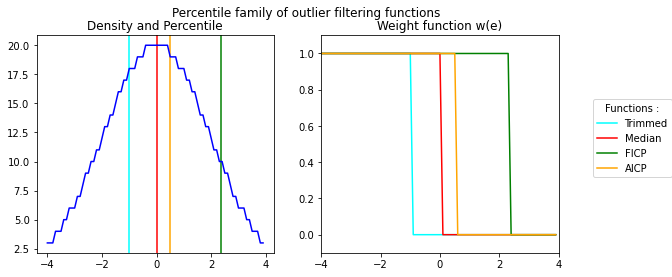

In [1]:
import matplotlib.pyplot as plt
import numpy as np

e = np.arange(-4,4,0.1)

def Trimmed(e,f):
    w = [0 for i in range (len(e))]
    for i in range (len(e)):
        if(e[i]<=np.percentile(e,f)):
            w[i] = 1
        else:
            w[i] = 0
    p = np.percentile(e,f)
    return (p,w)

def Median(e):
    w = [0 for i in range (len(e))]
    for i in range (len(e)):
        if(e[i]<=np.percentile(e,50)):
            w[i] = 1
        else:
            w[i] = 0
    p = np.percentile(e,50)
    return (p,w)

def AICP(e,f):
    return Trimmed(e,f)

    
def FICP(e,f):
    return Trimmed(e,f)

#--------------------------------Percentile Family--------------------------------------------------
e_perc = []
e_dens = (1/(2*np.sqrt(2*np.pi)))*np.exp(-np.power(e,2)/(2*np.power(2,2)))
e_dens_round = np.around(e_dens*100)
e_dens_round_int = e_dens_round.astype(int)
for i in range(e_dens_round_int.size):
    for j in range(e_dens_round_int[i]):
        e_perc.append(e[i])


(p_Trimmed,w_Trimmed) = Trimmed(e_perc,30)
(p_Median,w_Median) = Median(e_perc)
(p_AICP,w_AICP) = AICP(e_perc,60)
(p_FICP,w_FICP) = FICP(e_perc,90)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Percentile family of outlier filtering functions')

# Labels to use in the legend for each line
line_labels = ["Trimmed", "Median", "FICP", "AICP"]

# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created

ax1.title.set_text('Density and Percentile')
l1 = ax1.axvline(p_Trimmed, color="cyan")
l2 = ax1.axvline(p_Median, color="red")
l3 = ax1.axvline(p_FICP, color="green")
l4 = ax1.axvline(p_AICP, color="orange")
ax1.plot(e, e_dens_round_int, color="blue")


ax2.set_xlim([-4,4])
ax2.set_ylim([-0.1,1.1])
ax2.title.set_text("Weight function w(e)")
l5 = ax2.plot(e_perc,w_Trimmed,color="cyan")[0]
l6 = ax2.plot(e_perc,w_Median,color="red")[0]
l7 = ax2.plot(e_perc,w_FICP,color="green")[0]
l8 = ax2.plot(e_perc,w_AICP,color="orange")[0]

# Create the legend
fig.legend([l1,l2],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)

plt.show()